In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../dados/df_preparado.csv")

In [3]:
df.head(3)

,id,id_unique,numero_sei,ano_documento,assinaturas,descricao_tipo_documento,descricao_tipo_processo,numero_processo,id_unidade,sigla_unidade,...,link_documento,mercado_relevante,documentos_relacionados,descricao_especificacao,data_processo,_version_,corpo_texto,decisao_tribunal,conteudo,diferenca_dias
0,abbdc450-7ff1-4990-9bcc-8ae4386592f0,jurisprudencia__1390607,1390607,2024,Outras,Voto Processo Administrativo,Processo Administrativo,08700.004558/2019-05,110000967.0,GAB1,...,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,"pistões de motor, bronzinas, camisas, pinos, b...","{id_unidade:110000967,protocolo_documento:1085...","- Desmembrado Bernd Brünig, Faustino Luigi Mi...",2019-09-13,1800936057604145200,NaN,vazio,SEI/CADE - 1390607 - Voto Processo Administrat...,1714
1,b41e8f1f-449e-4d28-a574-18f365d32b6f,jurisprudencia__1384594,1384594,2024,Gustavo Augusto Freitas de Lima,Voto Processo Administrativo,Processo Administrativo,08700.004974/2015-71,110000969.0,GAB3,...,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,Mercado imobiliário,"{id_unidade:110000969,protocolo_documento:0257...",Influencia de conduta uniforme - COFECI,2015-05-21,1800936002855895000,NaN,condenacao,SEI/CADE - 1384594 - Voto Processo Administrat...,3276
2,adec625d-4f5e-4514-b938-a295fdc1e8a4,jurisprudencia__1384685,1384685,2024,Outras,Voto,Processo Administrativo,08700.005915/2022-40,110001021.0,DIAP,...,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,Postos de gasolina,"{id_unidade:110001021,protocolo_documento:1100...",Ministério Público do Estado de Minas Gerais,2022-08-08,1800936088917770200,voto\r\n\r\nI. BREVE RESUMO DO PROCESSO&nbsp;\...,arquivamento,SEI/CADE - 1384685 - Voto\n\n\nProcesso nº 087...,640


In [4]:
df['descricao_tipo_documento'].value_counts()

descricao_tipo_documento
Voto                            582
Voto Processo Administrativo    237
Voto Embargos de Declaração      75
Name: count, dtype: int64

In [5]:
plt.figure(figsize=(16,6))

contagem = df['grupo_setor'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos grupos economicos', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos Grupos Econômicos')

plt.show()

KeyError: 'grupo_setor'

<Figure size 1600x600 with 0 Axes>

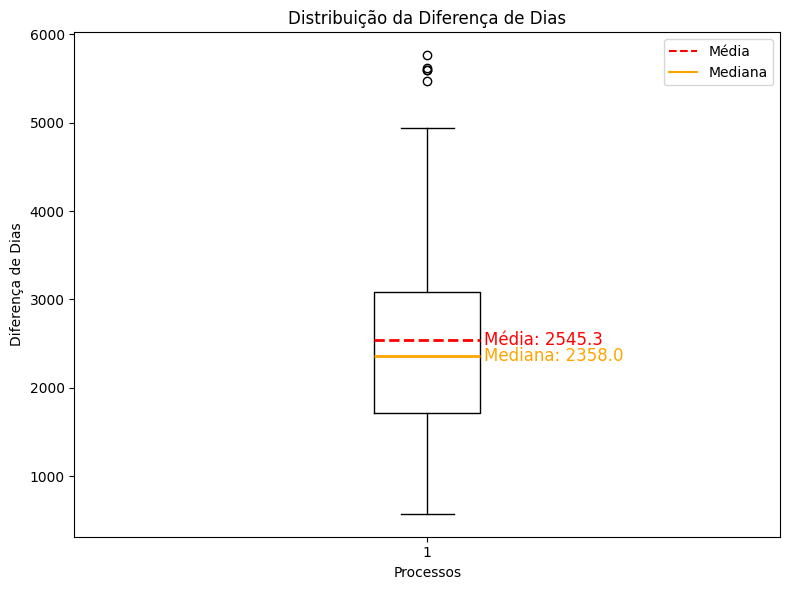

In [ ]:
# Supondo que df já está definido
dados = df['diferenca_dias']

media = np.mean(dados)
mediana = np.median(dados)

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(dados, showmeans=True, meanline=True,
                 meanprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2))

ax.set_title('Distribuição da Diferença de Dias')
ax.set_xlabel('Processos')
ax.set_ylabel('Diferença de Dias')

# Adiciona legenda
ax.annotate(f'Média: {media:.1f}', xy=(1.08, media), xycoords=('data', 'data'),
            color='red', fontsize=12, va='center')
ax.annotate(f'Mediana: {mediana:.1f}', xy=(1.08, mediana), xycoords=('data', 'data'),
            color='orange', fontsize=12, va='center')

# Adiciona legenda
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='red',linestyle='--', label='Média')
median_line = mlines.Line2D([], [], color='orange', label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.tight_layout()
plt.show()